<a href="https://colab.research.google.com/github/Lmnilsen/Mix/blob/main/ML_Final_Project_UHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###
### Import dependencies.
###

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
#from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
###
### Load the Online Shoppers Purchasing Intention Dataset
###

!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv
df = pd.read_csv("online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


<Axes: xlabel='Revenue', ylabel='count'>

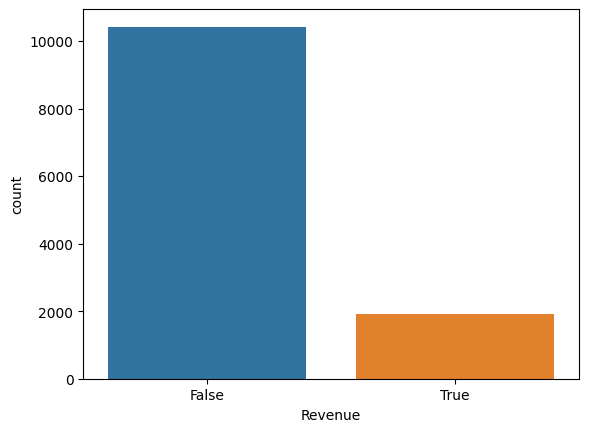

In [ ]:
###
### Plot the Revenue
###
sns.countplot(x='Revenue', data=df)

In [ ]:
###
### Preprocess the dataset with sklearn
###

# Encode VisitorType, TrafficType, Weekend, and Month with LabelEncoder
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['TrafficType'] = le.fit_transform(df['TrafficType'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Month'] = le.fit_transform(df['Month'])

X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Change the list over the Revenue from True / False to 1 / 0
y = y.astype(int)

In [ ]:
###
### Divide the data into training and test sets
###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
###
### Fit the training data to the random forest model
###

rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

randomforest_accuracy = accuracy_score(y_test, y_pred)
randomforest_precision = precision_score(y_test, y_pred)
randomforest_recall = recall_score(y_test, y_pred)
randomforest_f1 = f1_score(y_test, y_pred)

In [ ]:
###
### Fit the training data to the naive bayes bernoulli model
###
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)

BernoulliNB_accuracy = accuracy_score(y_test, y_pred)
BernoulliNB_precision = precision_score(y_test, y_pred)
BernoulliNB_recall = recall_score(y_test, y_pred)
BernoulliNB_f1 = f1_score(y_test, y_pred)

In [ ]:
###
### Fit the training data to the decision tree model
###
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, y_pred)
decision_tree_precision = precision_score(y_test, y_pred)
decision_tree_recall = recall_score(y_test, y_pred)
decision_tree_f1 = f1_score(y_test, y_pred)

In [ ]:
###
### Compare the results
###
print("RandomForestClassifier: ")
print('Accuracy: {:.5f}'.format(randomforest_accuracy))
print('Precision: {:.5f}'.format(randomforest_precision))
print('Recall: {:.5f}'.format(randomforest_recall))
print('F1-score: {:.5f} \n'.format(randomforest_f1))

print("BernoulliNB: ")
print('Accuracy: {:.5f}'.format(BernoulliNB_accuracy))
print('Precision: {:.5f}'.format(BernoulliNB_precision))
print('Recall: {:.5f}'.format(BernoulliNB_recall))
print('F1-score: {:.5f} \n'.format(BernoulliNB_f1))

print("Decision tree: ")
print('Accuracy: {:.5f}'.format(decision_tree_accuracy))
print('Precision: {:.5f}'.format(decision_tree_precision))
print('Recall: {:.5f}'.format(decision_tree_recall))
print('F1-score: {:.5f}'.format(decision_tree_f1))

RandomForestClassifier: 
Accuracy: 0.89850
Precision: 0.73109
Recall: 0.54976
F1-score: 0.62759 

BernoulliNB: 
Accuracy: 0.85672
Precision: 0.53434
Recall: 0.61453
F1-score: 0.57164 

Decision tree: 
Accuracy: 0.89653
Precision: 0.72458
Recall: 0.54028
F1-score: 0.61900


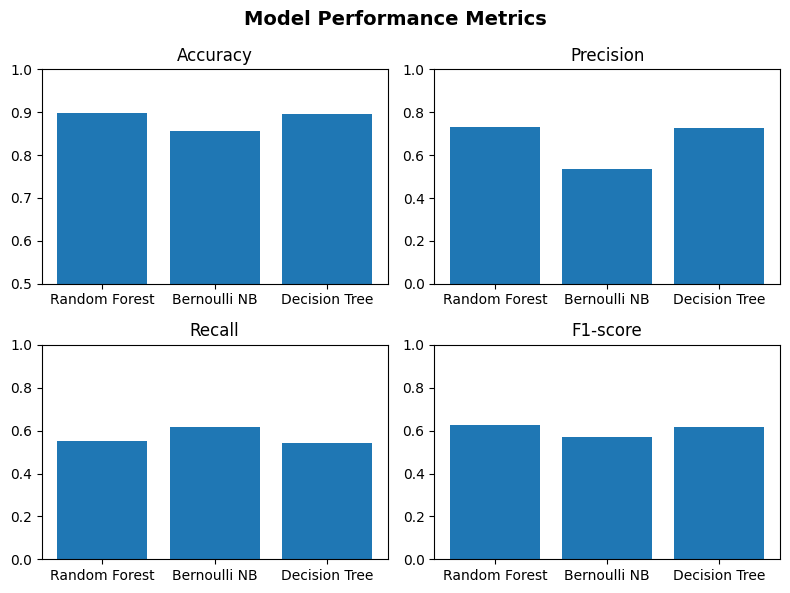

In [ ]:
###
### Plot the results
###

models = ['Random Forest', 'Bernoulli NB', 'Decision Tree']
accuracy = [randomforest_accuracy, BernoulliNB_accuracy, decision_tree_accuracy]
precision = [randomforest_precision, BernoulliNB_precision, decision_tree_precision]
recall = [randomforest_recall, BernoulliNB_recall, decision_tree_recall]
f1_score = [randomforest_f1, BernoulliNB_f1, decision_tree_f1]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

# Create bar plots for each performance metric
axs[0].bar(models, accuracy)
axs[0].set_title('Accuracy')
axs[1].bar(models, precision)
axs[1].set_title('Precision')
axs[2].bar(models, recall)
axs[2].set_title('Recall')
axs[3].bar(models, f1_score)
axs[3].set_title('F1-score')

axs[0].set_ylim([0.5, 1])
axs[1].set_ylim([0, 1])
axs[2].set_ylim([0, 1])
axs[3].set_ylim([0, 1])

# Add a title
fig.suptitle('Model Performance Metrics', fontsize=14, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()